### Task 1

Implement a neural network from scratch using only Numpy to handle matrix operations. Your task involves manually coding both the training and inference stages for a simple neural network, applying it to the provided dataset "neural network data.csv". Specifically, you are to develop a Stochastic Gradient Descent (SGD) algorithm without relying on external libraries beyond Numpy’s core functionalities, doing it all manually by yourself.

After training your custom-built neural network on the given dataset, evaluate its performance by reporting the accuracy in terms of the Root Mean Square Error (RMSE).

### Data Preprocessing:
The code first preprocesses the data. It reads a CSV file containing input features and target values. Then it standardizes the input features by subtracting the mean and dividing by the standard deviation. This is done to ensure that all features have a similar scale, which helps in training the neural network.

1. Subtract the mean: 
$$ X_{\text{mean}} = \frac{1}{n}\sum_{i=1}^{n} X_i $$

2. Divide by standard deviation: 
$$ X_{\text{std}} = \frac{X - X_{\text{mean}}}{\sigma} $$


### Neural Network Architecture:
The neural network architecture consists of an input layer, a hidden layer with ReLU activation, and an output layer.

1. **Forward Pass:**
   - Input to Hidden Layer: 
   $$ \text{hidden_output} = X \cdot W_{\text{input_hidden}} + b_{\text{hidden}} $$
   - Hidden Layer Activation (ReLU): 
   $$ \text{hidden_activation} = \max(0, \text{hidden_output}) $$
   - Hidden to Output Layer: 
   $$ \text{output} = \text{hidden_activation} \cdot W_{\text{hidden_output}} + b_{\text{output}} $$

2. **ReLU Function:**
   $$ \text{ReLU}(x) = \max(0, x) $$

3. **Loss Calculation:**
   The Mean Squared Error (MSE) loss function is used.
   $$ \text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{predicted}} - y_{\text{true}})^2 $$

4. **Backward Pass (Gradient Descent):**
   Gradients are computed and weights are updated to minimize the loss using gradient descent.
   - Output Layer Error: 
   $$ \text{output_error} = \frac{2}{n} \times (y_{\text{predicted}} - y_{\text{true}}) $$
   - Hidden Layer Error: 
   $$ \text{hidden_error} = \text{output_error} \cdot W_{\text{hidden_output}}^T $$
   - Update Weights: 
     $$ W_{\text{input_hidden}} -= \text{learning_rate} \times \frac{\partial \text{Loss}}{\partial W_{\text{input_hidden}}} $$
     $$ W_{\text{hidden\_output}} -= \text{learning_rate} \times \frac{\partial \text{Loss}}{\partial W_{\text{hidden_output}}} $$
   - Update Biases:
     $$ b_{\text{hidden}} -= \text{learning_rate} \times \frac{\partial \text{Loss}}{\partial b_{\text{hidden}}} $$
     $$ b_{\text{output}} -= \text{learning_rate} \times \frac{\partial \text{Loss}}{\partial b_{\text{output}}} $$

### Inference:
Finally, the trained model is used for inference, and Root Mean Squared Error (RMSE) is calculated to evaluate the model's performance.
$$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{\text{predicted}} - y_{\text{true}})^2} $$

This explanation provides a mathematical understanding of the code's operations in terms of data preprocessing, neural network architecture, training (including forward and backward passes), and evaluation.


In [40]:
import numpy as np
import pandas as pd

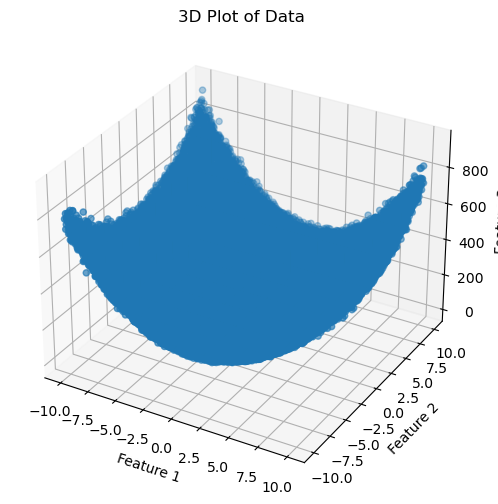

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the data
data = pd.read_csv("neural_network_data.csv")

# Plot the data in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2])
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Plot of Data')
plt.show()


In [42]:
# X will contain the feature values of your dataset.
# y will contain the target variable values of your dataset, 
# reshaped to a 2D array with one column.
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values.reshape(-1, 1)  # Target


In [43]:
# Normalization of Features: 
#    Adjusts the scale of features to make them comparable, 
#    improving model performance.

# Adding Bias Term: 
#    Introduces an intercept term in the model, enabling it 
#    to make predictions even when all features are zero.


X = (X - X.mean(axis=0)) / X.std(axis=0)
X = np.hstack((X, np.ones((X.shape[0], 1))))

In [44]:
'''
Setting Random Seed: Ensures consistent random number generation for 
reproducible results.

Defining Sizes: Determines the dimensions of the neural network
layers based on input features, hidden layer size, and output size.

Initializing Weights and Biases: Assigns random weights for 
connections between layers and initializes biases to zeros, 
setting up the initial parameters of the neural network 
before training.

'''

np.random.seed(42)
input_size = X.shape[1]
hidden_size = 10
output_size = 1

weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros((1, output_size))


In [45]:
'''
this function computes the forward propagation of input data through 
the neural network, applying activation functions to each layer to 
produce the final output.
'''
def forward_pass(X):
    # Input to hidden layer
    hidden_output = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_activation = np.maximum(hidden_output, 0)  # ReLU activation
    # Hidden to output layer 
    output = np.dot(hidden_activation, weights_hidden_output) + bias_output
    return output, hidden_activation


In [46]:
# Compute loss
def calculate_loss(predictions, targets):
    return np.mean((predictions - targets) ** 2)


In [47]:
# Backpropagation
'''
This function performs the backpropagation algorithm to compute 
the gradients of the neural network's parameters (weights and biases) 
with respect to the loss function
'''
def backward_pass(X, hidden_activation, predictions, targets):
    # Compute gradients
    output_error = 2 * (predictions - targets) / len(X)
    weights_hidden_output_gradient = np.dot(hidden_activation.T, output_error)
    bias_output_gradient = np.sum(output_error, axis=0, keepdims=True)

    hidden_error = np.dot(output_error, weights_hidden_output.T)
    hidden_error[hidden_activation <= 0] = 0  # ReLU derivative
    weights_input_hidden_gradient = np.dot(X.T, hidden_error)
    bias_hidden_gradient = np.sum(hidden_error, axis=0, keepdims=True)

    return weights_input_hidden_gradient, bias_hidden_gradient, weights_hidden_output_gradient, bias_output_gradient


In [48]:
#Update parameters
learning_rate = 0.001
num_epochs = 2000

for epoch in range(num_epochs):
    predictions, hidden_activation = forward_pass(X)
    loss = calculate_loss(predictions, y)
    gradients = backward_pass(X, hidden_activation, predictions, y)
    weights_input_hidden_gradient, bias_hidden_gradient, weights_hidden_output_gradient, bias_output_gradient = gradients

    # Update weights and biases
    weights_input_hidden -= learning_rate * weights_input_hidden_gradient
    bias_hidden -= learning_rate * bias_hidden_gradient
    weights_hidden_output -= learning_rate * weights_hidden_output_gradient
    bias_output -= learning_rate * bias_output_gradient

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss}")

# Inference
def predict(X):
    predictions, _ = forward_pass(X)
    return predictions

# Make predictions
predictions = predict(X)
print(predictions)


rmse = np.sqrt(np.mean((predictions - y) ** 2))
print("RMSE:", rmse)
mse = np.mean((predictions - y) ** 2)
print("(MSE):", mse)


Epoch 100, Loss: 1159.0050315369538
Epoch 200, Loss: 709.2595471006252
Epoch 300, Loss: 597.9599190040095
Epoch 400, Loss: 572.2982492124405
Epoch 500, Loss: 565.2629924382197
Epoch 600, Loss: 562.7904873322603
Epoch 700, Loss: 561.5520053343197
Epoch 800, Loss: 560.6287840668152
Epoch 900, Loss: 559.7857723706902
Epoch 1000, Loss: 559.0156474588928
Epoch 1100, Loss: 558.2874016647946
Epoch 1200, Loss: 557.5954894424281
Epoch 1300, Loss: 556.9505120428573
Epoch 1400, Loss: 556.3374847235812
Epoch 1500, Loss: 555.7366358714188
Epoch 1600, Loss: 555.159246643903
Epoch 1700, Loss: 554.6140767742787
Epoch 1800, Loss: 554.0931940949439
Epoch 1900, Loss: 553.584793536298
Epoch 2000, Loss: 553.0771931834754
[[723.99278714]
 [717.37655049]
 [710.76031384]
 ...
 [702.89879465]
 [709.60047992]
 [716.30216518]]
RMSE: 23.517487706568417
(MSE): 553.0722280285966


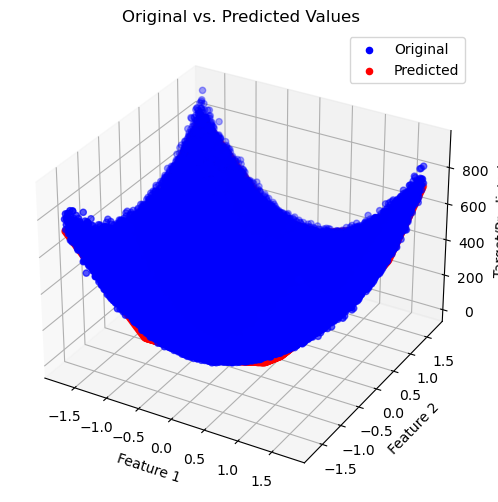

In [49]:

# Plot the results in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='b', label='Original')  # Original target values
ax.scatter(X[:, 0], X[:, 1], predictions, color='r', label='Predicted')  # Predicted values
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target/Predicted')
ax.set_title('Original vs. Predicted Values')
plt.legend()
plt.show()

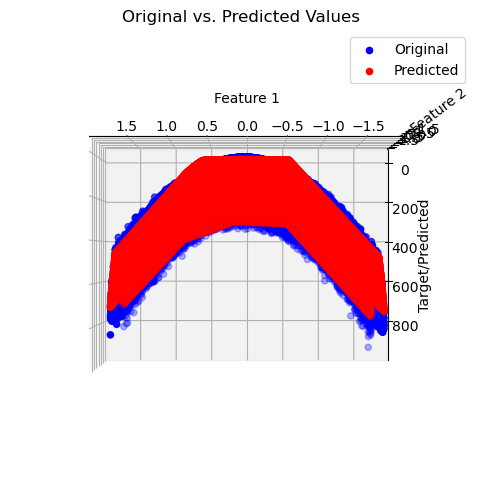

In [50]:
# Plot the results in 3D with reversed plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='b', label='Original')  # Original target values
ax.scatter(X[:, 0], X[:, 1], predictions, color='r', label='Predicted')  # Predicted values
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target/Predicted')
ax.set_title('Original vs. Predicted Values')

elevation = 180  # Elevation angle above the x-y plane (in degrees)
ax.view_init(elev=elevation, azim=azimuth)

plt.legend()
plt.show()
